In [3]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import Series, DataFrame
%matplotlib inline


# Read dataset 

In [32]:
df = pd.read_csv('mltest.csv')
df.head()

,id,spender,churned,store_usage,level,platform,country,cityPopulation,cityAverageInvestment,cityHasPve,days_played,churned_day_actions,action_before_churnday
0,5a7837a992bc5b771a75446b,0,1,0.0,1,IPhonePlayer,US,1,0,False,12,1,0
1,5959517eb147040ddcd0e8f8,0,1,0.0,1,IPhonePlayer,US,1,0,False,233,1,0
2,5a4436000ec25c4de6754f6b,0,1,0.0,1,WebGLPlayer,US,1,0,False,33,1,0
3,5803a415244e8cbe0ac8f513,0,1,0.0,1,Android,US,1,0,False,21,5,0
4,5776d78a82ca212921f143d2,0,1,0.0,1,IPhonePlayer,US,1,0,False,56,3,0


In [5]:
df.describe()

,spender,churned,store_usage,level,cityPopulation,cityAverageInvestment,days_played,churned_day_actions,action_before_churnday
count,734916.000000,734916.000000,734916.000000,734916.000000,734916.000000,7.349160e+05,734916.000000,734916.000000,7.349160e+05
mean,0.153064,0.950732,0.452682,14.559920,5.545159,2.030920e+09,183.616570,4.807426,7.114078e+00
std,0.360049,0.216428,2.627937,10.738261,6.885667,1.803709e+10,215.646486,500.756662,4.235961e+03
min,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000e+00,11.000000,1.000000,0.000000e+00
25%,0.000000,1.000000,0.150000,7.000000,1.000000,4.343000e+03,27.000000,1.000000,0.000000e+00
50%,0.000000,1.000000,0.430000,12.000000,2.000000,1.665000e+05,87.000000,2.000000,0.000000e+00
75%,0.000000,1.000000,0.730000,20.000000,7.000000,1.722431e+07,266.000000,4.000000,1.000000e+00
max,1.000000,1.000000,2181.540000,70.000000,26.000000,2.092217e+12,1134.000000,429226.000000,3.631361e+06


In [6]:
print(df.shape)


(734916, 13)


In [7]:
numerical_feats = df.dtypes[df.dtypes != "object"].index
print("Number of Numerical features: ", len(numerical_feats))

categorical_feats = df.dtypes[df.dtypes == "object"].index
print("Number of Categorical features: ", len(categorical_feats))

('Number of Numerical features: ', 10)
('Number of Categorical features: ', 3)


In [8]:
print(df[numerical_feats].columns)
print("*"*100)
print(df[categorical_feats].columns)

Index([u'spender', u'churned', u'store_usage', u'level', u'cityPopulation',
       u'cityAverageInvestment', u'cityHasPve', u'days_played',
       u'churned_day_actions', u'action_before_churnday'],
      dtype='object')
****************************************************************************************************
Index([u'id', u'platform', u'country'], dtype='object')


In [9]:
df[numerical_feats].head()

,spender,churned,store_usage,level,cityPopulation,cityAverageInvestment,cityHasPve,days_played,churned_day_actions,action_before_churnday
0,0,1,0.0,1,1,0,False,12,1,0
1,0,1,0.0,1,1,0,False,233,1,0
2,0,1,0.0,1,1,0,False,33,1,0
3,0,1,0.0,1,1,0,False,21,5,0
4,0,1,0.0,1,1,0,False,56,3,0


In [10]:
df[categorical_feats].head()

,id,platform,country
0,5a7837a992bc5b771a75446b,IPhonePlayer,US
1,5959517eb147040ddcd0e8f8,IPhonePlayer,US
2,5a4436000ec25c4de6754f6b,WebGLPlayer,US
3,5803a415244e8cbe0ac8f513,Android,US
4,5776d78a82ca212921f143d2,IPhonePlayer,US


In [11]:

# mode: this switch is important for letting the kernel run faster when doing some tests 
# it sets the number of cross validations used in the Model part and
# also turns on or off the time consuming plots done for all features in the EDA part

#mode = "edit"
mode = "demo"
#mode = "run"

if mode == "edit" :
    nr_cv = 2
    viz = 0
if mode == "demo" :
    nr_cv = 4
    viz = 1
if mode == "run" :
    nr_cv = 10
    viz = 1


# switch for using log values for SalePrice and features     
use_logvals = 1    
    
# target used for correlation 
target = 'churned'
if use_logvals == 1 :
    target = 'churned'
    
# only columns with correlation above this threshold value  
# are used for the ML Regressors in Part 3
min_val_corr = 0.4    
    
# set the number of features that are used (after ordering by correlation coefficient)    
nr_cols = 15
    
# switch for dropping columns that are similar to others already used and show a high correlation to these     
drop_similar = 1
        
# switch for using categorical features () like has_Pool, has_Tennis etc.    
use_catg = 0    

#
max_score = 0.8659
# SVR, nr_cols = 11, drop_similar = 1 (exclude "1stFlrSF"), use_logvals = 0, use_catg = 0


In [12]:
#if viz == 1:
    #for num in list(numerical_feats) :
        #sns.jointplot(num, target, data = df, kind='reg')
        #plt.show()

In [13]:
corr = df.corr()
corr_abs = corr.abs()

nr_num_cols = len(numerical_feats)
ser_corr = corr_abs.nlargest(nr_num_cols, target)[target]
cols = corr_abs.nlargest(nr_num_cols, target)[target].index

# Select columns with strong correlation to churned,
# drop columns with weak correlation
# threshold value is chosen in global settings
cols_abv_corr_limit = list(ser_corr[ser_corr.values > min_val_corr].index)
cols_bel_corr_limit = list(ser_corr[ser_corr.values <= min_val_corr].index)

In [14]:
print(ser_corr)
print("*"*30)
print("List of numerical features with r above min_val_corr :")
print(cols_abv_corr_limit)
print("*"*30)
print("List of numerical features with r below min_val_corr :")
print(cols_bel_corr_limit)


churned                   1.000000
level                     0.318894
cityPopulation            0.305121
cityAverageInvestment     0.225082
cityHasPve                0.211458
days_played               0.168941
spender                   0.106113
store_usage               0.021588
churned_day_actions       0.000757
action_before_churnday    0.000017
Name: churned, dtype: float64
******************************
List of numerical features with r above min_val_corr :
['churned']
******************************
List of numerical features with r below min_val_corr :
['level', 'cityPopulation', 'cityAverageInvestment', 'cityHasPve', 'days_played', 'spender', 'store_usage', 'churned_day_actions', 'action_before_churnday']


First Look - Correlation Matrix 

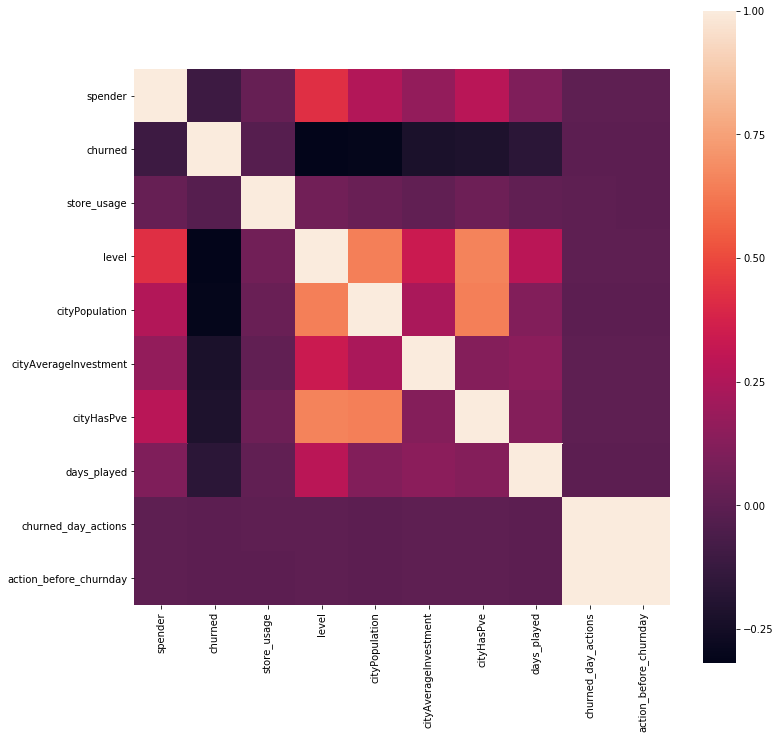

In [15]:
corr = df[numerical_feats].corr()

plt.figure(figsize=(12, 12))
sns.heatmap(corr, vmax=1, square=True)

In [16]:
corr_abs = corr.abs()
print (corr_abs.nlargest(nr_cols, target)[target])

cols = corr_abs.nlargest(nr_cols, target)[target].index
cm = np.corrcoef(df[numerical_feats][cols].values.T)

plt.figure(figsize=(10,10))
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

churned                   1.000000
level                     0.318894
cityPopulation            0.305121
cityAverageInvestment     0.225082
cityHasPve                0.211458
days_played               0.168941
spender                   0.106113
store_usage               0.021588
churned_day_actions       0.000757
action_before_churnday    0.000017
Name: churned, dtype: float64


AttributeError: 'float' object has no attribute 'shape'

Of those features with the largest correlation to churned, some also are correlated strongly to each other. We need further steps to remove the effect of correlated factors. 

Building dataset for ML analysis 

In [28]:
X = df[numerical_feats]
y = df['churned']

X.info()
y.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 734916 entries, 0 to 734915
Data columns (total 10 columns):
spender                   734916 non-null int64
churned                   734916 non-null int64
store_usage               734916 non-null float64
level                     734916 non-null int64
cityPopulation            734916 non-null int64
cityAverageInvestment     734916 non-null int64
cityHasPve                734916 non-null bool
days_played               734916 non-null int64
churned_day_actions       734916 non-null int64
action_before_churnday    734916 non-null int64
dtypes: bool(1), float64(1), int64(8)
memory usage: 51.2 MB


count    734916.000000
mean          0.950732
std           0.216428
min           0.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           1.000000
Name: churned, dtype: float64

Decision Tree Regressor

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
param_grid = {'min_samples_leaf' : [2,3,4,5,6,7,8,9,10,11,14,20], 'min_samples_split' : [2,3,4,5,6,7,8,9,10,11,14,20]}
grid_dtree = GridSearchCV(DecisionTreeRegressor(), param_grid, cv=nr_cv, refit=True, verbose=1, scoring = 0.4)
grid_dtree.fit(X, y)

sc_dtree = get_best_score(grid_dtree)

In [ ]:
dtree_pred = grid_dtree.predict(X_test)
sub_dtree = pd.DataFrame()
sub_dtree['id'] = id_test
sub_dtree['Churned'] = dtree_pred

Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor

param_grid = {'min_samples_leaf' : [2,3,4,5,6,7,8,9,10], 'min_samples_split' : [2,3,4,5,6,7,8,9,10,11,12]}
grid_rf = GridSearchCV(RandomForestRegressor(), param_grid, cv=nr_cv, refit=True, verbose=1, scoring = 0.4)
grid_rf.fit(X, y)

sc_rf = get_best_score(grid_rf)